# K-means clustering

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# model 
from sklearn.cluster import KMeans   
from sklearn.preprocessing import StandardScaler 

#importing the data in features
X= df[['age', 'fare']]
X.age.fillna(value = X['age'].mean(), inplace = True)
#scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform clustering 
model = KMeans(n_clusters = 5)
model.fit(X_scaled)

C:\Users\AS\AppData\Local\Temp\ipykernel_2824\3085939122.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value = X['age'].mean(), inplace = True)
C:\Users\AS\AppData\Local\Temp\ipykernel_2824\3085939122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value = X['age'].mean(), inplace = True)


KMeans(n_clusters=5)

In [7]:
X_scaled

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

In [5]:
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [3]:
df['cluster']=model.labels_

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [4]:
df['cluster'].unique()

array([0, 2, 1, 3, 4])

<function matplotlib.pyplot.show(close=None, block=None)>

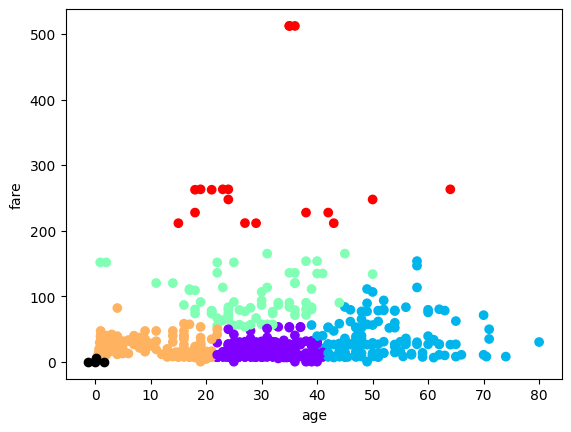

In [5]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap = 'rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel("age")
plt.ylabel('fare')
plt.show

In [6]:
import plotly.express as px
fig = px.scatter(df, x = 'age', y='fare', color = df['cluster'])
fig.show()

In [32]:
fig = px.scatter_3d(df, x = 'age', y='fare',z = 'pclass', color = df['cluster'])
fig.show()

In [9]:
df['cluster'] = df['pclass']

In [7]:
px.parallel_coordinates(df, color='cluster', title='Titanic Clusters')
